In [1]:
import numpy as np
import pandas as pd
import json
import os
import matplotlib.pyplot as plt 
import itertools
from matplotlib import cm
from utils.lists import *
from utils.utils import *
import glob
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
import matplotlib.colors as mcolors
from matplotlib_venn import venn3, venn3_circles
import pegasus as pg

/gpfs/gibbs/pi/gerstein/ah2428/conda_envs/r2r/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# ED Fig 4a. MDD snDEGs binary plot

In [10]:
deg_all = pd.read_csv('/home/ah2428/palmer_scratch/supp_tables/txt/MDD_DEG_MAST_and_Wilcox.txt',sep='\t')
deg_all = deg_all[deg_all.Celltype.isin(['EXN','IN','OLG','OPC','END','AST','MG'])]

In [11]:
N=len(deg_all.Genename.unique())

In [12]:
degs = []
for celltype in ['EXN','IN','OLG','OPC','END','AST','MG']:
    deg = deg_all[deg_all.Celltype==celltype]
    deg_up = deg[deg['MAST log2FC'] > 0].Genename
    deg_down = deg[deg['MAST log2FC'] < 0].Genename
    deg_up_down = list(itertools.chain(*[deg_up,deg_down]))
    print(len(deg_up_down))
    degs.append(deg_up_down)

53
259
121
101
1008
364
408


In [13]:
all_degs = list(set(list(itertools.chain(*degs))))

In [14]:
all_vals = []
for i in range(7):
    vals = []
    for deg in all_degs:
        if deg in degs[i]:
            val = 1
        else:
            val = 0
        vals.append(val)
    all_vals.append(vals)

In [15]:
arr = np.array(all_vals)

In [16]:
celltypes = ['EXN','IN','OLG','OPC','END','AST','MG']

In [17]:
df = pd.DataFrame(arr.T,columns=celltypes,index=all_degs)

In [18]:
df1 = df.sort_values(by=celltypes,ascending=False)

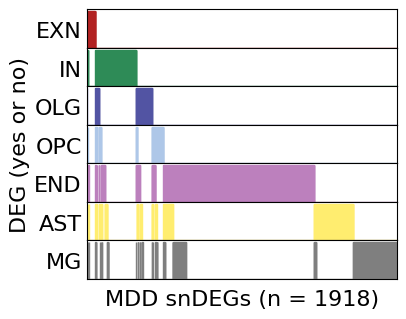

In [19]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.size'] = '16'

colors = list(celltype_colors2.values())
fig, ax = plt.subplots(7,1,sharex=True,figsize=(4,3.5),frameon=True)
ax = ax.flatten()

for ii,s in enumerate(celltypes):
    df1[[s]].plot.bar(ax=ax[ii],width=1,color=colors[ii],edgecolor=colors[ii])
    ax[ii].get_legend().remove()
    ax[ii].set_xticks([])
    ax[ii].set(yticks=np.array([0.5]),yticklabels=[s])
    ax[ii].tick_params(axis=u'both', which=u'both',length=0)
ax[3].set_ylabel('DEG (yes or no)',rotation=90)
n_deg = df1.shape[0]

plt.xlabel(f'MDD snDEGs (n = {n_deg})')

fig.subplots_adjust(wspace=0,hspace=0)
plt.savefig('/home/ah2428/palmer_scratch/figs/ed4/deg_binary.pdf',bbox_inches='tight',dpi=300)

# ED Fig. 4b Bulk MDD comparison

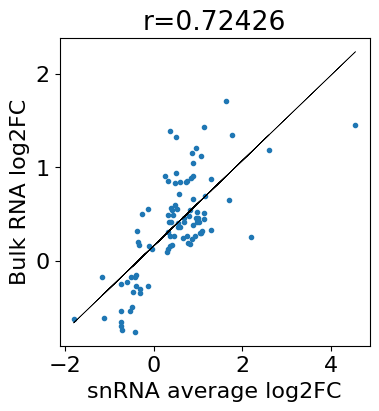

In [20]:
sc_deg = pd.read_csv('/home/ah2428/palmer_scratch/supp_tables/MDD_DEG_MAST_and_Wilcox.csv',sep='\t')
sc_deg = sc_deg[sc_deg.Celltype.isin(['EXN','IN','OLG','OPC','END','AST','MG'])]
bulk_deg = pd.read_csv('/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/RNA/mdd_A9_degs.csv')

bulk_fcs = []
sc_fcs = []
for g in list(set(sc_deg.Genename.unique())&set(bulk_deg.Genename.unique())):
    bulk_fc = bulk_deg[bulk_deg.Genename==g]['log2FoldChange'].values[0]
    sc_fc = sc_deg[sc_deg.Genename==g]['MAST log2FC'].values.mean()
    bulk_fcs.append(bulk_fc)
    sc_fcs.append(sc_fc)

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.size'] = '16'
fig, ax = plt.subplots(figsize=(4,4))
x = sc_fcs
y = bulk_fcs
x = np.array(x)
y = np.array(y)

ax.plot(x,y,'.')
corr = np.corrcoef(x,y)[0][1]
r2 = np.round(corr**2,2)
m, b = np.polyfit(x,y,1)
ax.plot(x, m*x+b, color='k',linewidth=0.5)
ax.set_title(f'r={np.round(corr,5)}')
ax.set_xlabel('snRNA average log2FC')
ax.set_ylabel('Bulk RNA log2FC')
plt.savefig('/home/ah2428/palmer_scratch/figs/ed4/MDD_bulk_vs_snrna_log2FC.pdf',bbox_inches='tight',dpi=300)

# ED Fig. 4c MDD DEG heatmap

/tmp/ipykernel_3707552/3799966230.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deg_celltype['celltype'] = celltype
/gpfs/gibbs/pi/gerstein/ah2428/conda_envs/r2r/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_3707552/3799966230.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deg_celltype['celltype'] = celltype
/gpfs/gibbs/pi/gerstein/ah2428/conda_envs/r2r/lib/python3.

54


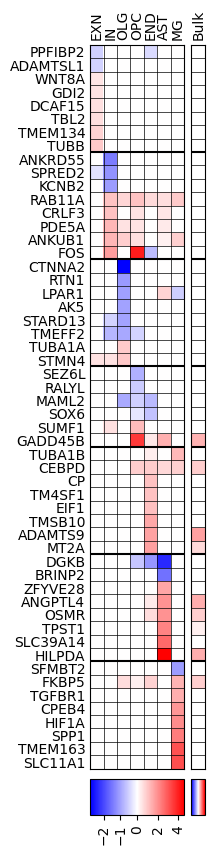

In [23]:
deg = pd.read_csv('/home/ah2428/ShareZhangLab/PTSD/RNA/DEG_results_df/snRNA/MDD_vs_CON/MAST_WILCOX_intersect.csv',sep='\t')

dfs = []
for celltype in ['EXC','INH','OLI','OPC','END','AST','MIC']:
    deg_celltype = deg[deg.Celltype==celltype]
    deg_celltype['celltype'] = celltype
    deg_celltype = deg_celltype.sort_values('FDR')
    deg_celltype['mlogfdr'] = -np.log10(deg_celltype['FDR'])
    dfs.append(deg_celltype)

dfs = pd.concat(dfs)

num=8
top_genes = []
for celltype in ['EXC','INH','OLI','OPC','END','AST','MIC']:
    top_df = dfs[dfs.celltype==celltype][:num]
    df = dfs[dfs.celltype==celltype]
    if len(top_df.mlogfdr.unique()) == 1:
        x = df[df['mlogfdr']==df.mlogfdr.values[0]].sort_values('log2FC',key=abs,ascending=False)[:num]
    else:
        x = df.sort_values('FDR')[:num]
    x = x.sort_values('log2FC')
    top_genes.append(x.Genename.values)

ordered_genes = []

for x in top_genes[0]:
    ordered_genes.append(x)
    
for i in top_genes[1:]:
    for j in i:
        if j in ordered_genes:
            pass
        else:
            ordered_genes.append(j)

print(len(ordered_genes))
fcs_all = []
for ii,gene in enumerate(ordered_genes):
    df = dfs[dfs.Genename==gene]
    fcs = []
    for celltype in ['EXC','INH','OLI','OPC','END','AST','MIC']:
        if celltype in df.celltype.values:
            celltype_fc = df[df.celltype==celltype].log2FC.values[0]
        else:
            celltype_fc = 0.0
        fcs.append(celltype_fc)
    fcs_all.append(fcs)

fcs_all = np.array(fcs_all)
bulk_deg = pd.read_csv('/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/RNA/mdd_A9_degs.csv')

bulk_df = bulk_deg[bulk_deg.Genename.isin(ordered_genes)]
bulk_vals = bulk_df.set_index('Genename').reindex(ordered_genes)['log2FoldChange'].values
bulk_vals = bulk_vals.reshape(len(ordered_genes),1)
df = pd.DataFrame(fcs_all,index=ordered_genes)
df2 = df.reindex(ordered_genes)

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
fig, ax = plt.subplots(1,2,figsize=(20,10))
fig.subplots_adjust(wspace=-0.959)
plt.rcParams['font.size']='10'
celltypes = ['EXN','IN','OLG','OPC','END','AST','MG']
norm = mcolors.TwoSlopeNorm(vcenter=0)

p1 = ax[0].imshow(np.array(df2),cmap='bwr',norm=norm)
ax[0].set_xticks(np.arange(len(celltypes)))
ax[0].set_xticklabels(celltypes,rotation=90)
ax[0].set_yticks(np.arange(len(ordered_genes)))
ax[0].set_yticklabels(ordered_genes)

ax[0].set_xticks(np.arange(-0.5,len(celltypes)-1),minor=True)
ax[0].set_xticklabels(celltypes,rotation=90)
ax[0].tick_params(axis=u'both', which=u'both',length=0, top=True, labeltop=True, bottom=False, labelbottom=False)

ax[0].set_xticks(np.arange(-0.5, len(celltypes)-1),minor=True)
ax[0].set_yticks(np.arange(-0.5, df2.shape[0]-1),minor=True)
ax[0].grid(which='minor', color='k', linewidth=0.5)
ax[0].grid(which='major',linewidth=0)

p2 = ax[1].imshow(bulk_vals,cmap='bwr',norm=norm)
ax[1].set_xticks(np.arange(1))
ax[1].set_xticklabels(['Bulk'],rotation=90)
ax[1].set_yticks([])
ax[1].tick_params(axis=u'both', which=u'both',length=0, top=True, labeltop=True, bottom=False, labelbottom=False)

ax[1].set_yticks(np.arange(-0.5, df2.shape[0]-1),minor=True)
ax[1].grid(which='minor', color='k', linewidth=0.5)
ax[1].grid(which='major',linewidth=0)
ax[1].tick_params(axis=u'both', which=u'both',length=0)

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
divider = make_axes_locatable(ax[0])
cax = divider.append_axes('bottom', size="5%", pad=0.1)
cb = fig.colorbar(p1,ax=ax[0],cax=cax, orientation='horizontal',ticks=[-2,-1,0,2,4])
cb.ax.tick_params(rotation=90)

divider2 = make_axes_locatable(ax[1])
cax2 = divider2.append_axes('bottom', size="5%", pad=0.1)
cb2 = fig.colorbar(p2,ax=ax[1],cax=cax2, orientation='horizontal')
cb2.set_ticks([])
#cb2.ax.tick_params(rotation=90)

for i in [ax[0],ax[1]]:
    for l in [8,16,24,30,38,46]:
        i.axhline(y=l-0.5,color='k')
plt.savefig('/home/ah2428/palmer_scratch/figs/ed4/mdd_deg_heatmap.pdf',bbox_inches='tight',dpi=500)

# ED Fig. 4d PTSD vs MDD DEGs

In [24]:
mdd_deg = pd.read_csv('/home/ah2428/ShareZhangLab/PTSD/RNA/DEG_results_df/snRNA/MDD_vs_CON/MAST_WILCOX_intersect.csv',sep='\t')
ptsd_deg = pd.read_csv('/home/ah2428/ShareZhangLab/PTSD/RNA/DEG_results_df/snRNA/PTSD_vs_CON/MAST_WILCOX_intersect.csv',sep='\t')

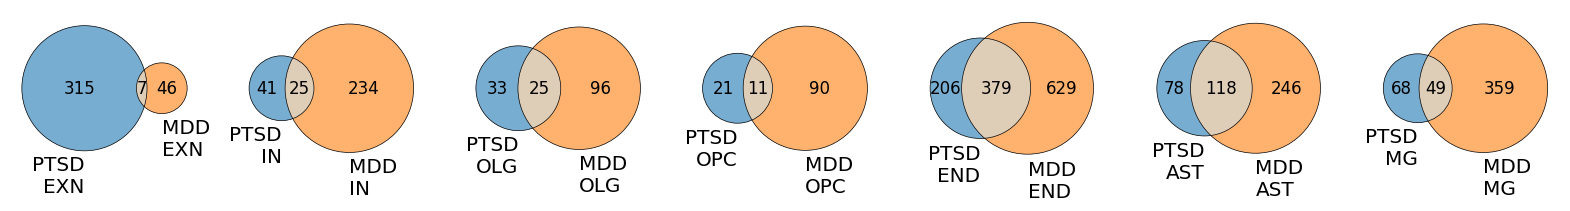

In [25]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.size']='12'

fig, ax = plt.subplots(1,7,figsize=(20,5))
ax = ax.flatten()

for i,celltype,celltype2 in zip(np.arange(7),['EXC','INH','OLI','OPC','END','AST','MIC'],['EXN','IN','OLG','OPC','END','AST','MG']):
    x = ptsd_deg[ptsd_deg.Celltype==celltype].Genename
    y = mdd_deg[mdd_deg.Celltype==celltype].Genename
    inter = len(list(set(x) & set(y)))

    venn2(subsets = (len(x)-inter, len(y)-inter, inter), set_labels = (f'PTSD\n{celltype2}', f'MDD\n{celltype2}'),set_colors=('tab:blue','tab:orange'),alpha=0.6,ax=ax[i])
    venn2_circles(subsets = (len(x)-inter, len(y)-inter, inter),linewidth=0.5,ax=ax[i])
plt.savefig('/home/ah2428/palmer_scratch/figs/ed4/ptsd_mdd_celltype_venn.pdf',bbox_inches='tight',dpi=300)

# ED Fig. 4e PTSD vs MDD divergent genes

In [3]:
df = pd.read_csv('/home/ah2428/palmer_scratch/supp_tables/PTSD_vs_MDD_divergent_genes_subtypes.csv',sep='\t')

In [4]:
len(df.Genename.unique())

131

In [5]:
df['diff'] = np.abs(df['PTSD MAST log2FC']) + np.abs(df['MDD MAST log2FC'])
ptsd_up_div = df[df['PTSD MAST log2FC'] > 0]
ptsd_down_div = df[df['PTSD MAST log2FC'] < 0]

In [30]:
list1 = []
list1_genes = []
for celltype in ['CUX2','RORB','FEZF2','OPRK1','LAMP5','KCNG1','VIP','SST','PVALB','OLG','OPC','END','AST','MG']:
    celltype_genes = ptsd_up_div[ptsd_up_div.Celltype==celltype].Genename.unique()
    list1.append(len(celltype_genes))
    list1_genes.append(celltype_genes)

list2 = []
list2_genes = []
for celltype in ['CUX2','RORB','FEZF2','OPRK1','LAMP5','KCNG1','VIP','SST','PVALB','OLG','OPC','END','AST','MG']:
    celltype_genes = ptsd_down_div[ptsd_down_div.Celltype==celltype].Genename.unique()
    list2.append(len(celltype_genes))
    list2_genes.append(celltype_genes)

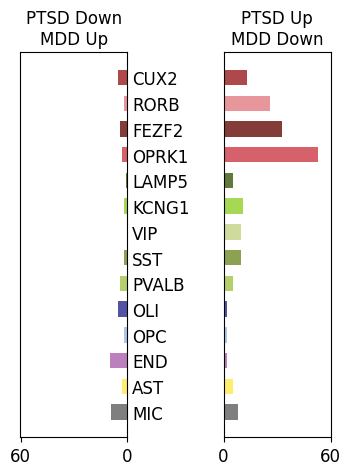

In [31]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.size'] = '12'

fig, ax = plt.subplots(1,2, figsize=(4,5))
plt.subplots_adjust(wspace=0.9)

celltypes = ['CUX2','RORB','FEZF2','OPRK1','LAMP5','KCNG1','VIP','SST','PVALB','OLI','OPC','END','AST','MIC']
ax[1].barh(np.arange(14), list1[::-1], color = list(celltype_colors.values())[:14][::-1],height=0.6)
ax[1].set_yticks([]) 
ax[1].set(xticks=[0,60])
ax[1].set_title('PTSD Up\nMDD Down',fontsize=12)

ax[0].barh(np.arange(14), list(np.array(list2)*-1)[::-1], color = list(celltype_colors.values())[:14][::-1],height=0.6)
ax[0].set_yticks(np.arange(14))
ax[0].set_yticklabels(celltypes[::-1])
ax[0].yaxis.tick_right()
ax[0].tick_params(axis='y', which=u'both',length=0)
ax[0].set(xticks=[0,-60],xticklabels=[0,60])
ax[0].set_title('PTSD Down\nMDD Up',fontsize=12)
plt.savefig('/home/ah2428/palmer_scratch/figs/ed4/div_genes_barplot.pdf',bbox_inches='tight',dpi=300)

# ED Fig. 4f Divergent genes GO

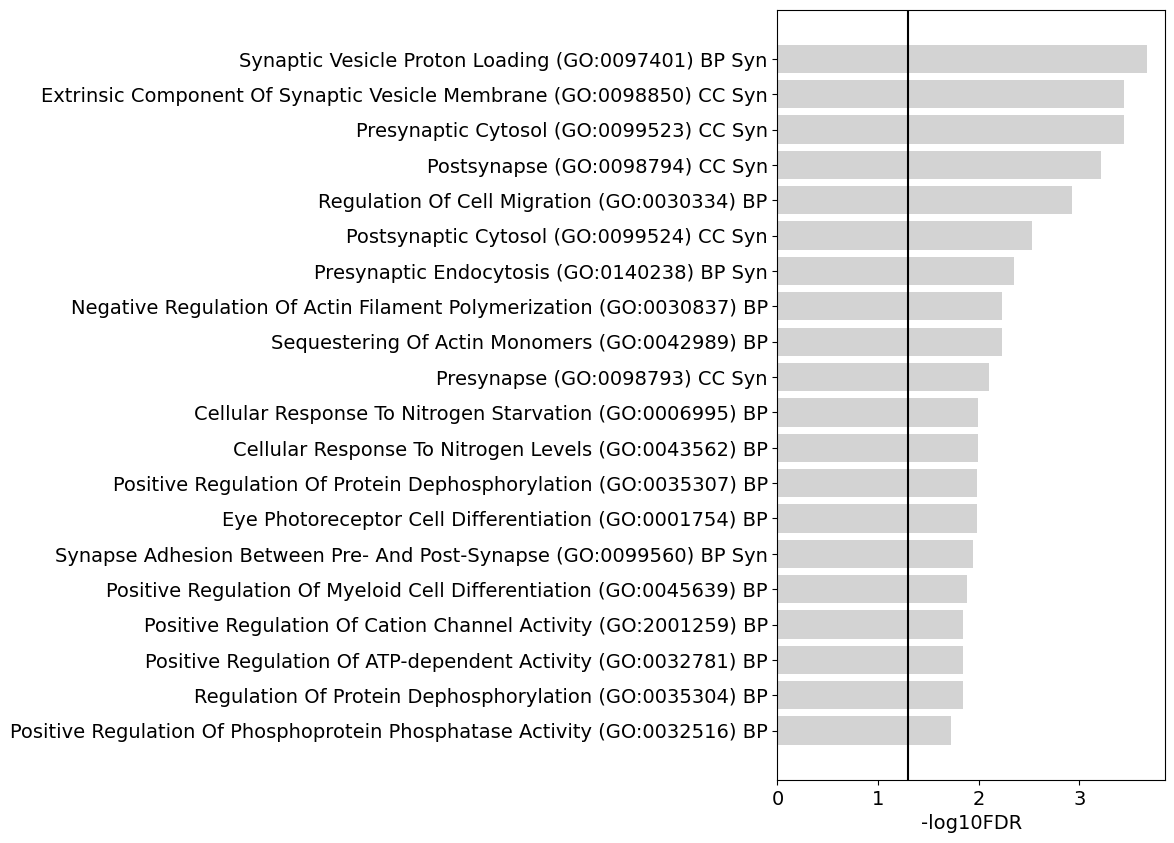

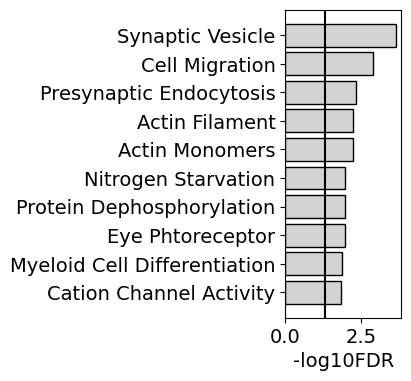

In [40]:
bp = pd.read_csv('/home/ah2428/ShareZhangLab/PTSD/RNA/GO/131_PTSD_MDD_div_GO/BP.txt',sep='\t')
syn = pd.read_csv('/home/ah2428/ShareZhangLab/PTSD/RNA/GO/131_PTSD_MDD_div_GO/SynGO.txt',sep='\t')

bp = bp[['Term','Adjusted P-value','Genes']]
bp['name'] = 'BP'
syn = syn[['Term','Adjusted P-value','Genes']]
syn['name'] = 'Syn'

df = pd.concat([bp,syn])
df['-log10FDR'] = -np.log10(df['Adjusted P-value'])
df = df.sort_values('-log10FDR',ascending=False)

df2 = df[:20]

plt.rcParams['font.size']='14'
fig, ax = plt.subplots(figsize=(5,10))
terms = df2.Term+' '+df2.name
terms = terms[::-1]
plt.barh(terms,df2['-log10FDR'][::-1],color='lightgray')
plt.axvline(-np.log10(0.05),color='k')
plt.xlabel('-log10FDR')

include = ['Synaptic Vesicle Proton Loading (GO:0097401) BP',
           'Regulation Of Cell Migration (GO:0030334)',
           'Presynaptic Endocytosis (GO:0140238) BP',
           'Negative Regulation Of Actin Filament Polymerization (GO:0030837)',
           'Sequestering Of Actin Monomers (GO:0042989)',
           'Cellular Response To Nitrogen Starvation (GO:0006995)',
           'Positive Regulation Of Protein Dephosphorylation (GO:0035307)',
           'Eye Photoreceptor Cell Differentiation (GO:0001754)',
           'Positive Regulation Of Myeloid Cell Differentiation (GO:0045639)',
           'Positive Regulation Of Cation Channel Activity (GO:2001259)']

df = df[df.Term.isin(include)]

terms = ['Synaptic Vesicle',
         'Cell Migration',
         'Presynaptic Endocytosis',
         'Actin Filament',
         'Actin Monomers',
         'Nitrogen Starvation',
         'Protein Dephosphorylation',
         'Eye Phtoreceptor',
         'Myeloid Cell Differentiation',
         'Cation Channel Activity']

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.size'] = '14'

fig, ax = plt.subplots(figsize=(1.5,4))

ax.barh(np.arange(len(terms)), df['-log10FDR'], align='center', color='lightgray', edgecolor='black', linewidth=1)
ax.set_yticks(np.arange(df.shape[0]))
ax.set_yticklabels(terms)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('-log10FDR')
ax.axvline(-np.log10(0.05),color='k')
plt.savefig('/home/ah2428/palmer_scratch/figs/ed4/div_GO.pdf',bbox_inches='tight',dpi=300)

# ED Fig. 4g PTSD Up MDD Down genes

In [4]:
ptsd_mdd = pg.read_input('/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/RNA/data/PTSD_MDD.zarr')
ptsd_mdd.obs.subclass = ptsd_mdd.obs.subclass.cat.reorder_categories(['CUX2','RORB','FEZF2','OPRK1','LAMP5','KCNG1','VIP','SST','PVALB','OLI','OPC','END','AST','MIC'])

/gpfs/gibbs/pi/gerstein/ah2428/conda_envs/pegasus/lib/python3.10/site-packages/pegasusio/zarr_utils.py:77: FutureWarning: The NestedDirectoryStore is deprecated and will be removed in a Zarr-Python version 3, see https://github.com/zarr-developers/zarr-python/issues/1274 for more information.
  self.store = zarr.NestedDirectoryStore(path) if os.path.isdir(path) else zarr.ZipStore(path, mode = 'r')


2024-09-14 18:16:48,587 - pegasusio.readwrite - INFO - zarr file '/gpfs/gibbs/pi/gerstein/jz435/ShareZhangLab/PTSD/RNA/data/PTSD_MDD.zarr' is loaded.
2024-09-14 18:16:48,588 - pegasusio.readwrite - INFO - Function 'read_input' finished in 207.09s.


In [6]:
ptsd_up_div.sort_values('diff',ascending=False).Genename.unique()[:11]

array(['MTRNR2L12', 'TMSB4X', 'EEF1A1', 'NACA', 'PDE1A', 'KHDRBS3',
       'EIF1', 'CALM3', 'AQP4', 'PEBP1', 'PSAP'], dtype=object)

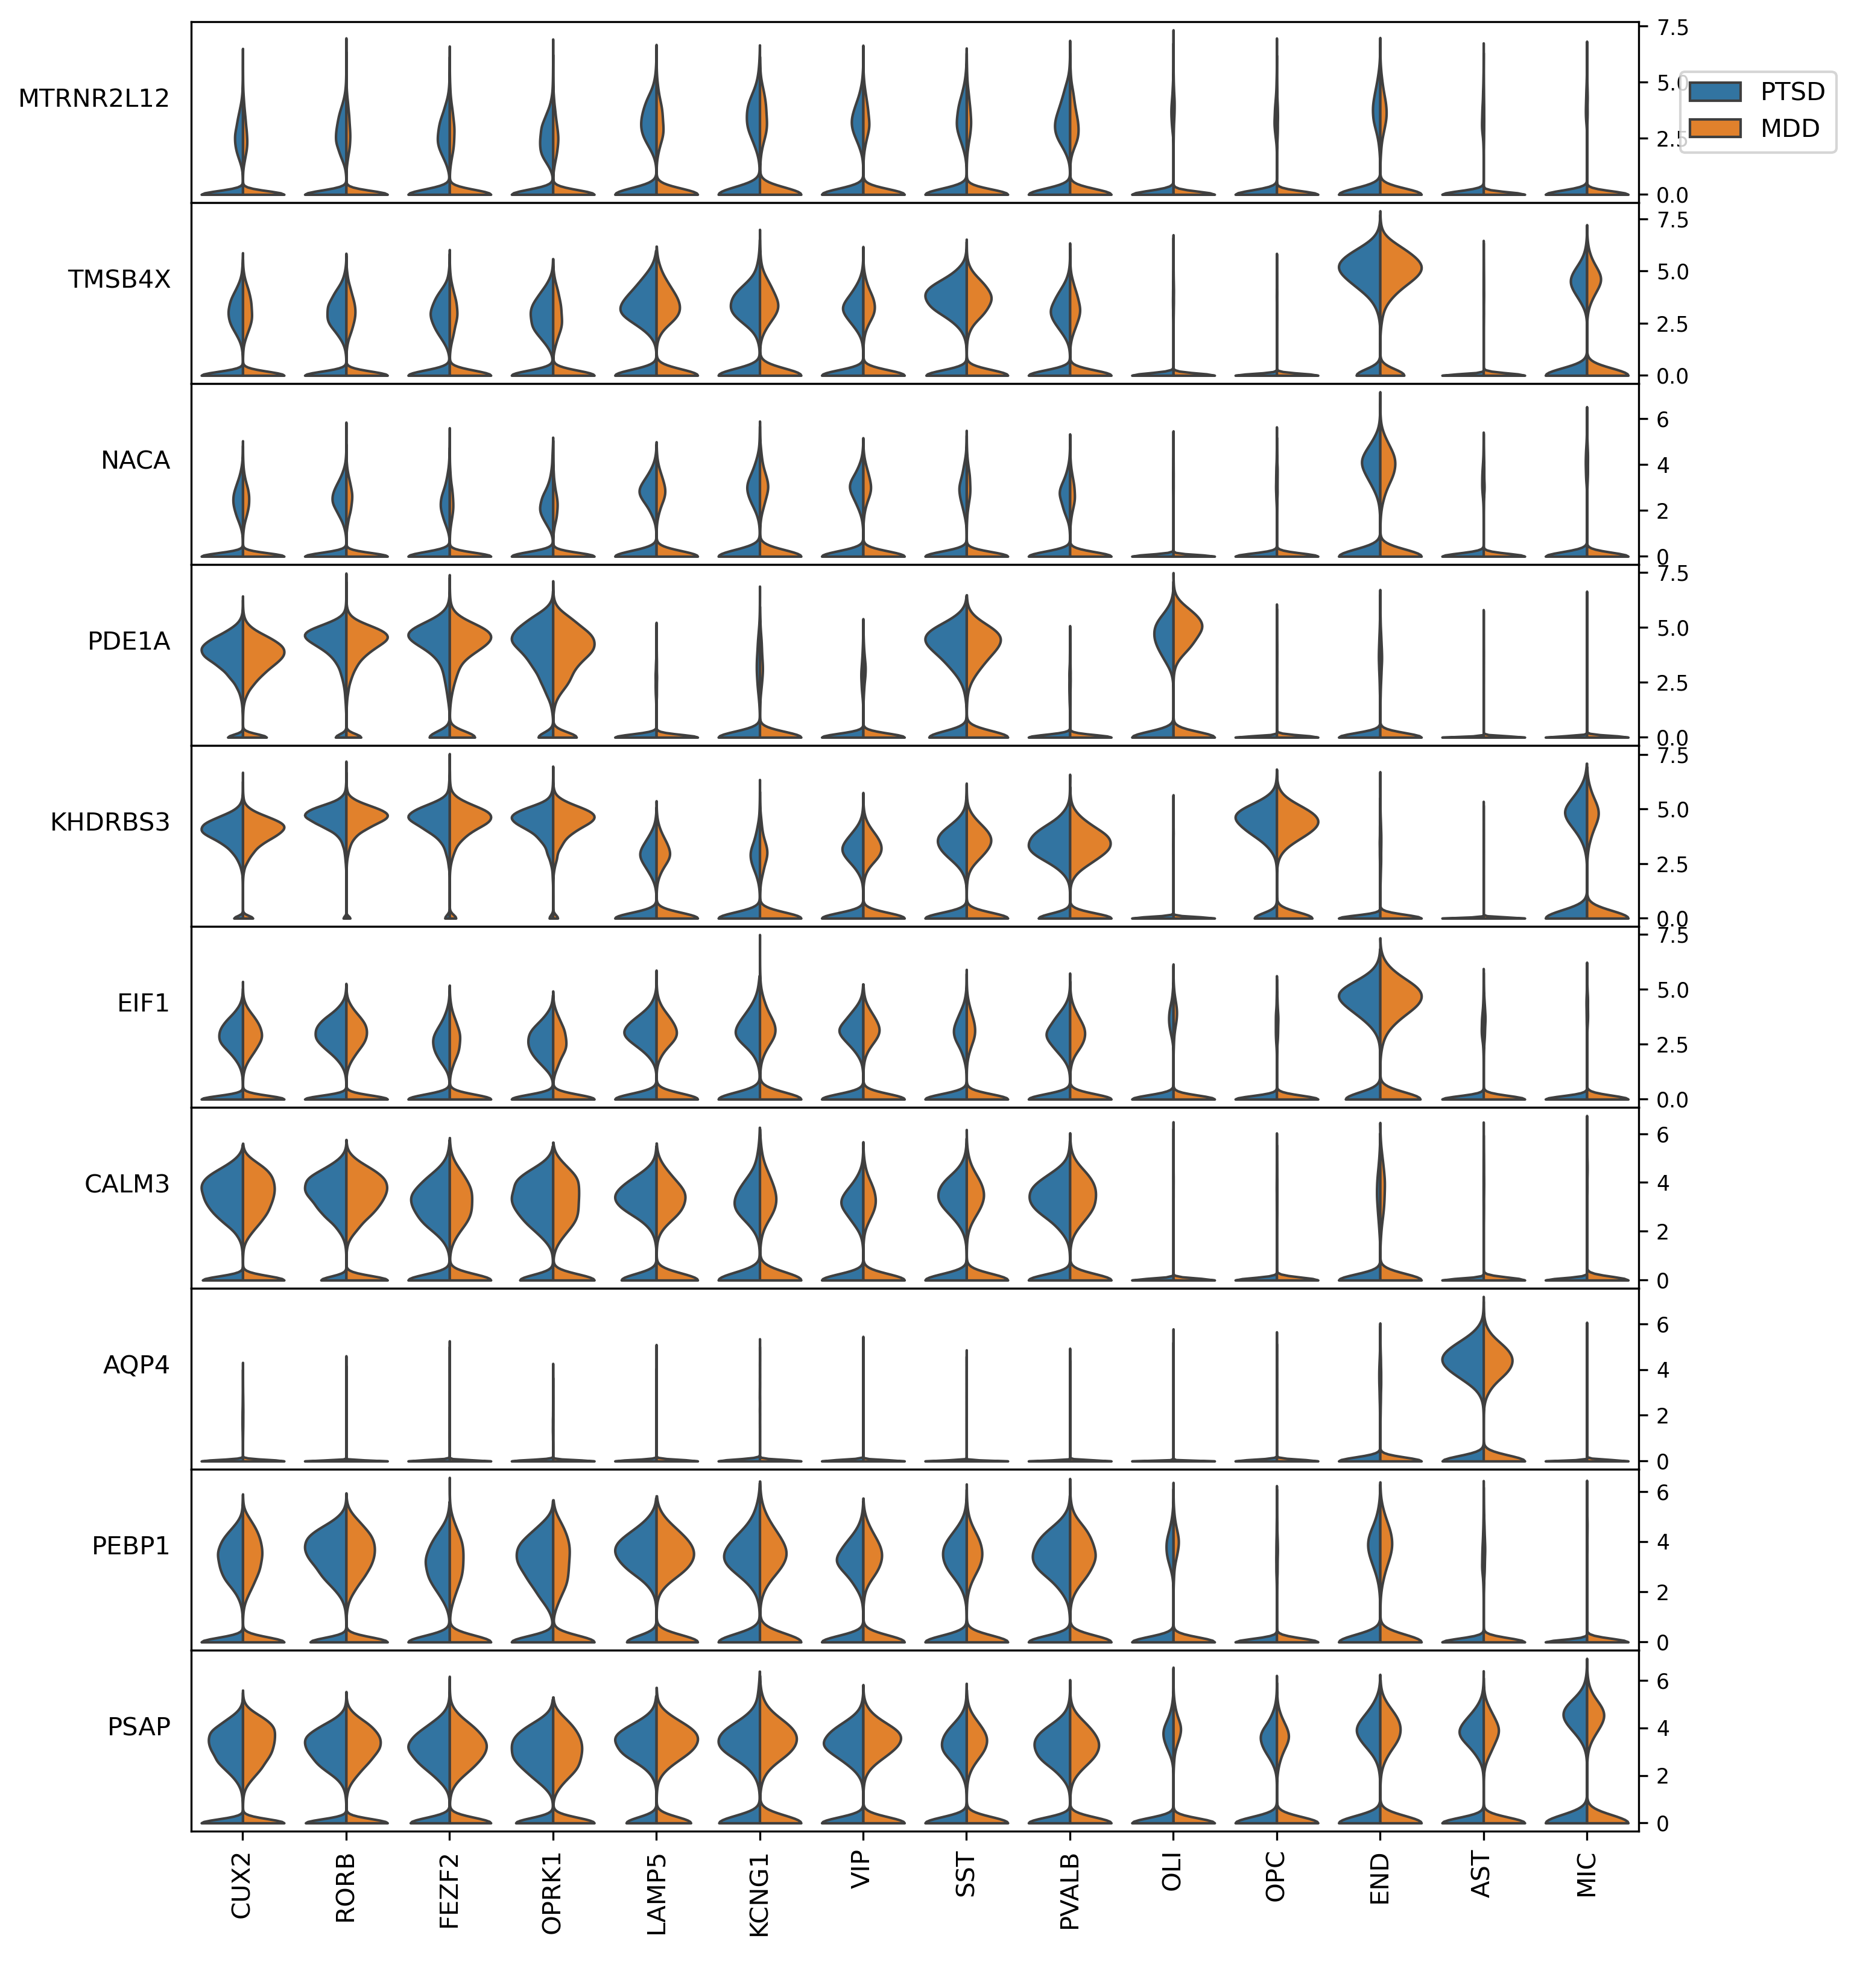

In [7]:
pg.violin(ptsd_mdd,attrs=['MTRNR2L12', 'TMSB4X', 'NACA', 'PDE1A', 'KHDRBS3', 'EIF1', 'CALM3', 'AQP4', 'PEBP1', 'PSAP'],groupby='subclass',hue='Condition',panel_size=(8,1))
plt.xlabel(' ')
plt.savefig('/home/ah2428/palmer_scratch/figs/ed4/ptsd_up_violin.pdf',bbox_inches='tight',dpi=300)

# ED Fig. 4h PTSD Down MDD Up genes

In [50]:
ptsd_down_div.sort_values('diff',ascending=False).Genename.unique()[:11]

array(['HSPH1', 'ATP6V1B2', 'DNAJB1', 'VEGFA', 'OAZ1', 'PDE1A', 'ANK2',
       'MAP3K13', 'SCIN', 'HSPA1A', 'ETS1'], dtype=object)

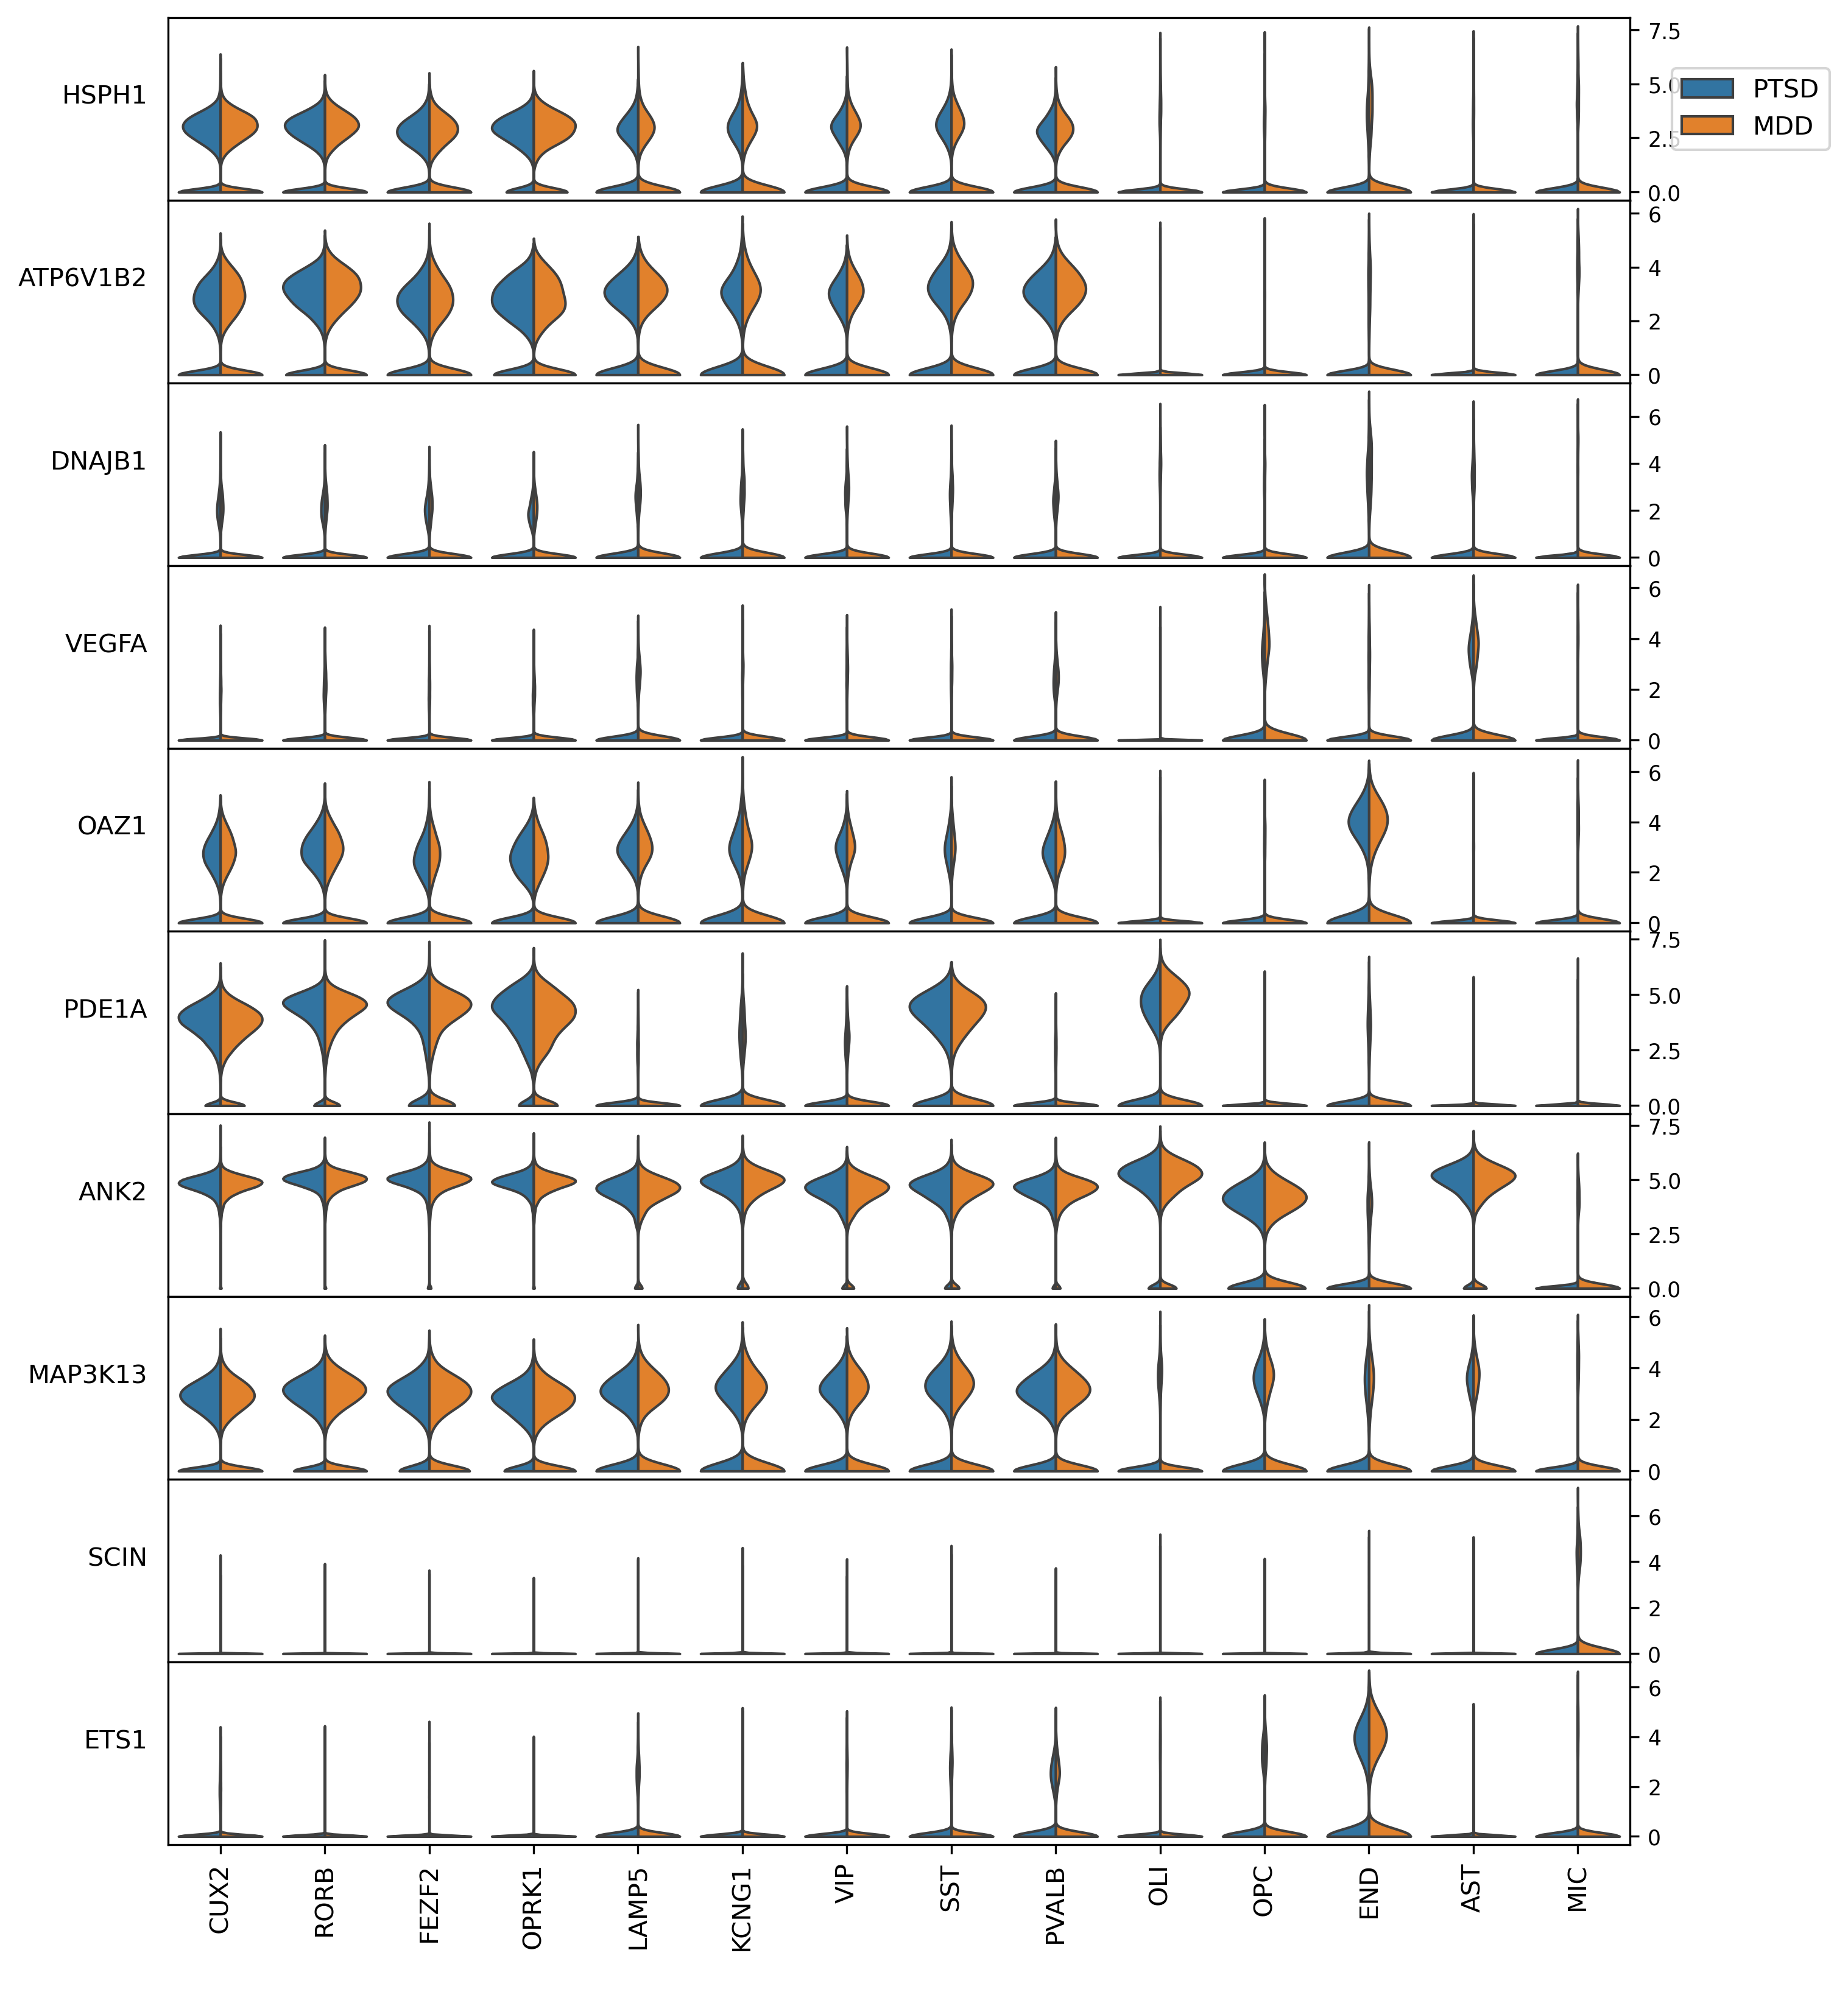

In [9]:
pg.violin(ptsd_mdd,attrs=['HSPH1', 'ATP6V1B2', 'DNAJB1', 'VEGFA', 'OAZ1', 'PDE1A', 'ANK2', 'MAP3K13', 'SCIN', 'ETS1'],groupby='subclass',hue='Condition',panel_size=(8,1))
plt.xlabel(' ')
plt.savefig('/home/ah2428/palmer_scratch/figs/ed4/ptsd_down_violin.pdf',bbox_inches='tight',dpi=300)

# ED Fig. 4i PTSD vs PTSD (+MDD) vs PTSD (-MDD)

In [55]:
ptsd = pd.read_csv('/home/ah2428/ShareZhangLab/PTSD/RNA/DEG_results_df/snRNA/PTSD_vs_CON/MAST_WILCOX_intersect.csv',sep='\t')
ptsd_with_mdd = pd.read_csv('/home/ah2428/ShareZhangLab/PTSD/RNA/DEG_results_df/snRNA/PTSD_with_MDD_vs_CON/MAST_WILCOX_intersect.csv',sep='\t')
ptsd_without_mdd = pd.read_csv('/home/ah2428/ShareZhangLab/PTSD/RNA/DEG_results_df/snRNA/PTSD_without_MDD_vs_CON/MAST_WILCOX_intersect.csv',sep='\t')

In [56]:
ptsd = ptsd[ptsd.Celltype.isin(['EXC','INH','OLI','OPC','END','AST','MIC'])]

/tmp/ipykernel_3707552/1527332191.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ptsd_celltype = ptsd[ptsd.Celltype==cell][ptsd.log2FC > 0].Genename.values
/tmp/ipykernel_3707552/1527332191.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ptsd_with_mdd_celltype = ptsd_with_mdd[ptsd_with_mdd.Celltype==cell][ptsd_with_mdd.log2FC > 0].Genename.values
/tmp/ipykernel_3707552/1527332191.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ptsd_without_mdd_celltype = ptsd_without_mdd[ptsd_without_mdd.Celltype==cell][ptsd_without_mdd.log2FC > 0].Genename.values
/tmp/ipykernel_3707552/1527332191.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ptsd_celltype = ptsd[ptsd.Celltype==cell][ptsd.log2FC > 0].Genename.values
/tmp/ipykernel_3707552/1527332191.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ptsd_with_mdd_celltyp

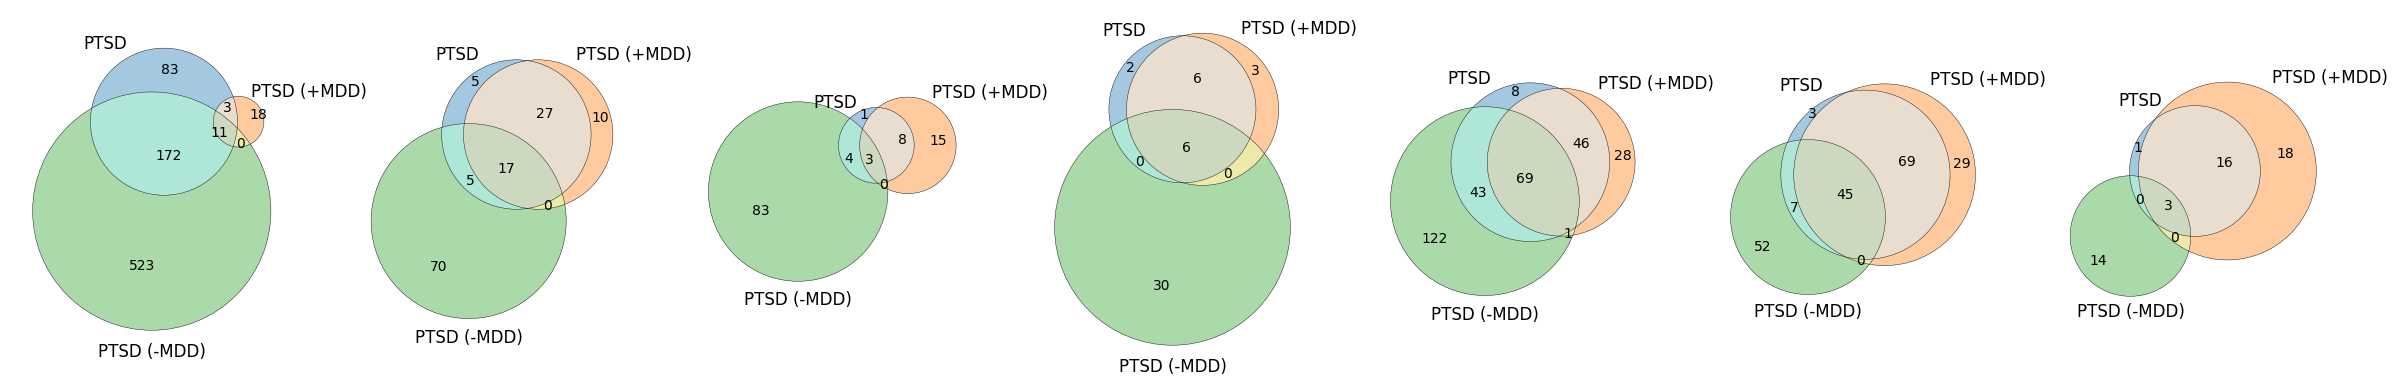

In [57]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

plt.rcParams['font.size'] = '10'
colors = [celltype_colors[i] for i in ['EXC','INH','OLI','OPC','END','AST','MIC']]

fig, ax = plt.subplots(1,7,figsize=(30,5))
ax = ax.flatten()

for ii,cell in zip(np.arange(len(celltypes)),['EXC','INH','OLI','OPC','END','AST','MIC']):
    
    ptsd_celltype = ptsd[ptsd.Celltype==cell][ptsd.log2FC > 0].Genename.values
    ptsd_with_mdd_celltype = ptsd_with_mdd[ptsd_with_mdd.Celltype==cell][ptsd_with_mdd.log2FC > 0].Genename.values
    ptsd_without_mdd_celltype = ptsd_without_mdd[ptsd_without_mdd.Celltype==cell][ptsd_without_mdd.log2FC > 0].Genename.values

    venn3([set(ptsd_celltype), set(ptsd_with_mdd_celltype), set(ptsd_without_mdd_celltype)], ('PTSD', 'PTSD (+MDD)', 'PTSD (-MDD)'),set_colors=('tab:blue','tab:orange','tab:green'),ax=ax[ii])
    venn3_circles(subsets=[set(ptsd_celltype), set(ptsd_with_mdd_celltype), set(ptsd_without_mdd_celltype)],linewidth=0.3,ax=ax[ii])
plt.savefig('/home/ah2428/palmer_scratch/figs/ed4/PTSD_with_without_MDD_venn_up.pdf',bbox_inches='tight',dpi=300)

/tmp/ipykernel_3707552/1505165.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ptsd_celltype = ptsd[ptsd.Celltype==cell][ptsd.log2FC < 0].Genename.values
/tmp/ipykernel_3707552/1505165.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ptsd_with_mdd_celltype = ptsd_with_mdd[ptsd_with_mdd.Celltype==cell][ptsd_with_mdd.log2FC < 0].Genename.values
/tmp/ipykernel_3707552/1505165.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ptsd_without_mdd_celltype = ptsd_without_mdd[ptsd_without_mdd.Celltype==cell][ptsd_without_mdd.log2FC < 0].Genename.values
/tmp/ipykernel_3707552/1505165.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ptsd_celltype = ptsd[ptsd.Celltype==cell][ptsd.log2FC < 0].Genename.values
/tmp/ipykernel_3707552/1505165.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ptsd_with_mdd_celltype = ptsd_with_m

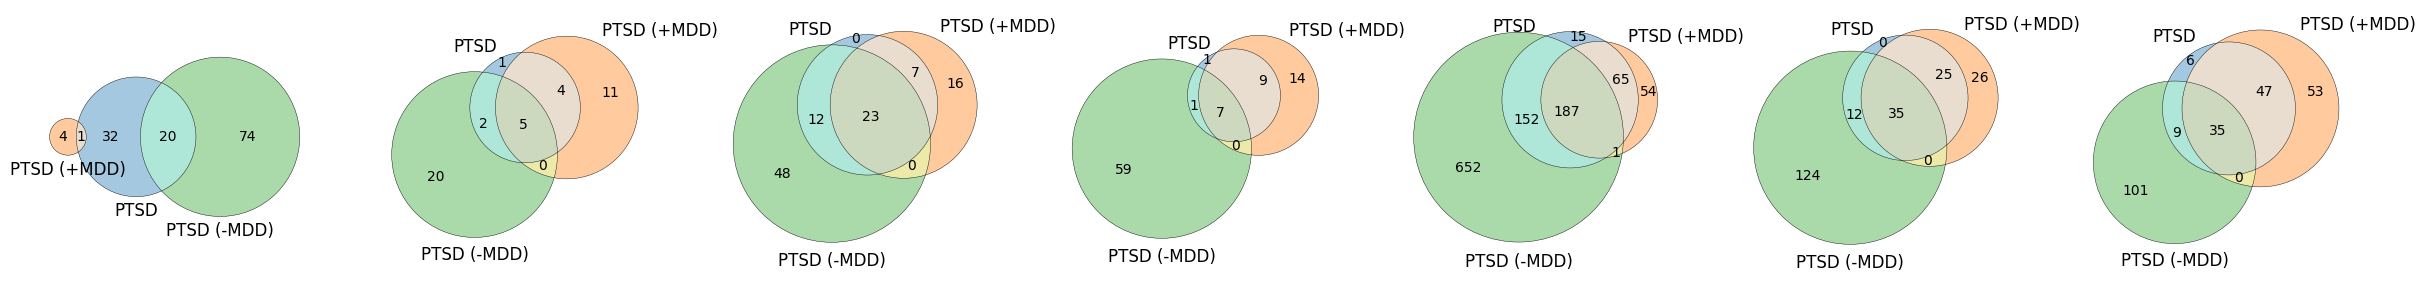

In [58]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

plt.rcParams['font.size'] = '10'
colors = [celltype_colors[i] for i in ['EXC','INH','OLI','OPC','END','AST','MIC']]

fig, ax = plt.subplots(1,7,figsize=(30,5))
ax = ax.flatten()

for ii,cell in zip(np.arange(len(celltypes)),['EXC','INH','OLI','OPC','END','AST','MIC']):
    
    ptsd_celltype = ptsd[ptsd.Celltype==cell][ptsd.log2FC < 0].Genename.values
    ptsd_with_mdd_celltype = ptsd_with_mdd[ptsd_with_mdd.Celltype==cell][ptsd_with_mdd.log2FC < 0].Genename.values
    ptsd_without_mdd_celltype = ptsd_without_mdd[ptsd_without_mdd.Celltype==cell][ptsd_without_mdd.log2FC < 0].Genename.values

    venn3([set(ptsd_celltype), set(ptsd_with_mdd_celltype), set(ptsd_without_mdd_celltype)], ('PTSD', 'PTSD (+MDD)', 'PTSD (-MDD)'),set_colors=('tab:blue','tab:orange','tab:green'),ax=ax[ii])
    venn3_circles(subsets=[set(ptsd_celltype), set(ptsd_with_mdd_celltype), set(ptsd_without_mdd_celltype)],linewidth=0.3,ax=ax[ii])
plt.savefig('/home/ah2428/palmer_scratch/figs/ed4/PTSD_with_without_MDD_venn_down.pdf',bbox_inches='tight',dpi=300)